In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import seaborn as sns

In [2]:
df=pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.shape

(500, 2)

In [4]:
df["sentiment"].value_counts()

sentiment
negative    263
positive    237
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     500 non-null    object
 1   sentiment  500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


In [6]:
df.describe()

,review,sentiment
count,500,500
unique,500,2
top,One of the other reviewers has mentioned that ...,negative
freq,1,263


In [7]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
def clean_review(review):
    stri=' '.join(word for word in review.split() if word.lower() not in stopwords.words("english"))
    return stri

In [9]:
df["review"]=df["review"].apply(clean_review)

In [10]:
df

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,positive
1,wonderful little production. filming technique...,positive
2,thought wonderful way spend time hot summer we...,positive
3,Basically there's family little boy (Jake) thi...,negative
4,"Petter Mattei's ""Love Time Money"" visually stu...",positive
...,...,...
495,"""American Nightmare"" officially tied, opinion,...",negative
496,"First off, say loved book Animal Farm. read 9t...",negative
497,movie extremely boring. laughed times. decided...,negative
498,"disgusted movie. graphic sex scenes, ruined im...",negative


In [11]:
#wordcloud: font size besi jobe jodi besi bar repeat hoi word ta,sei onnujayi fontsize change hobe

In [12]:
from wordcloud import WordCloud

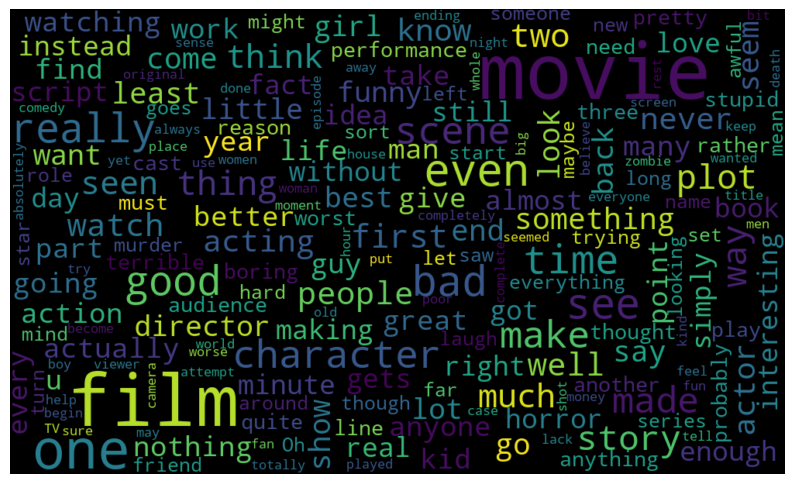

In [13]:
#Draw WordCloud
reviews=' '.join(word for word in df["review"][df["sentiment"]=="negative"].astype("str"))
wc=WordCloud(height=600,width=1000,max_font_size=100)
plt.figure(figsize=(10,8))
plt.imshow(wc.generate(reviews),interpolation="bilinear")
plt.axis("off")
plt.show()

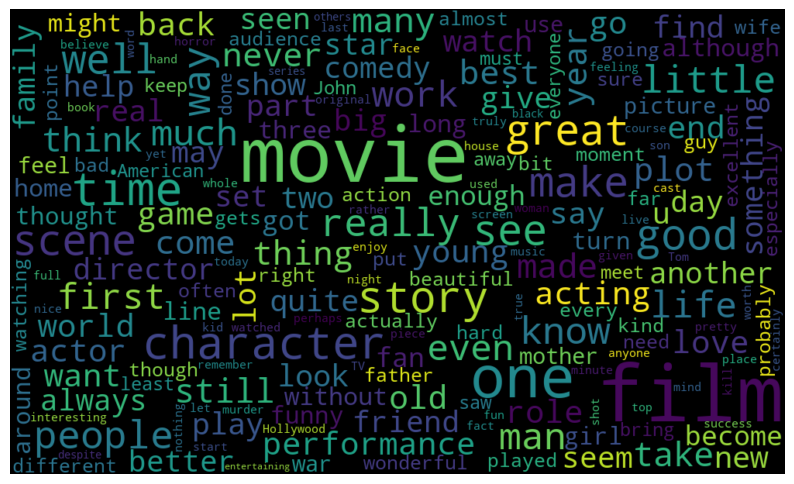

In [14]:
reviews=' '.join(word for word in df["review"][df["sentiment"]=="positive"].astype("str"))
wc=WordCloud(height=600,width=1000,max_font_size=100)
plt.figure(figsize=(10,8))
plt.imshow(wc.generate(reviews),interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
vectorizer=TfidfVectorizer(max_features=2500)
reviews=vectorizer.fit_transform(df["review"]).toarray()

In [18]:
df["sentiment"].replace({"positive":1,"negative":0},inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_14460\3225820470.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sentiment"].replace({"positive":1,"negative":0},inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_14460\3225820470.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sentim

In [19]:
df["sentiment"].value_counts()

sentiment
0    263
1    237
Name: count, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
reviews_train,reviews_test,sentiment_train,sentiment_test=train_test_split(reviews,df["sentiment"],test_size=0.2,random_state=42)

In [22]:
log=LogisticRegression()
log.fit(reviews_train,sentiment_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
prediction=log.predict(reviews_test)
prediction

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [24]:
log.score(reviews_test,sentiment_test)

0.79

<Figure size 1200x800 with 0 Axes>

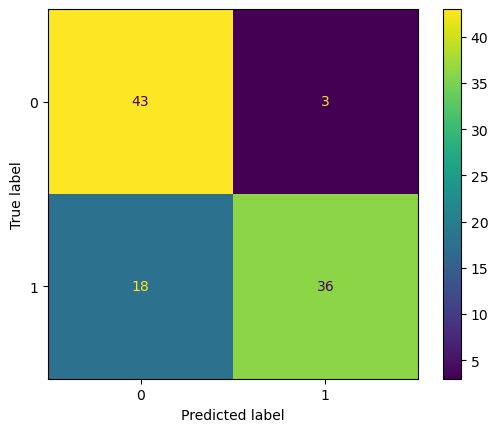

In [25]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(sentiment_test,prediction,labels=log.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log.classes_)
plt.figure(figsize=(12,8))
display.plot()
plt.show()

In [26]:
import pickle

In [27]:
pickle.dump(log,open("sentu.pkl","wb"))

In [28]:
pickle.dump(vectorizer,open("scaler.pkl","wb"))